In [2]:
import pandas as pd
import geopandas as gpd
import fiona
from shapely.geometry import Point
import os

C:\Users\jcge9\AppData\Local\Temp\ipykernel_10640\1038754735.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [47]:
## Se usará el paquete de fiona para poder pasar los archivos SHP a KML
fiona.supported_drivers['KML'] = 'rw'

In [48]:
enp = gpd.read_file("../../data/enps_canarias/eennpp.shp")
bandama_grid = gpd.read_file("../../results/C-14.kml", driver = "kml")
especies_tsv = pd.read_csv("../data/coord_plantae.tsv", sep = "\t")

In [49]:
bandama = enp[enp["nombre"] == "Bandama"]
bandama = bandama.to_crs(epsg=4326) 

In [50]:
gdf_especies = gpd.GeoDataFrame(especies_tsv, geometry=gpd.points_from_xy(especies_tsv['longitude'], especies_tsv['latitude']))
gdf_especies = gdf_especies.set_crs(epsg=4326, inplace=True)
gdf_especies = gdf_especies[gdf_especies["category"] == "Especie nativa"]
gdf_especies_nativa = gdf_especies[gdf_especies["category"] == "Especie nativa"]

In [51]:
#bandama_grid = 
bandama_grid["cuadricula"] = range(len(bandama_grid) )

In [52]:
bandama_especies = gpd.sjoin(gdf_especies, bandama, how="inner", op="within")

C:\Users\jcge9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [53]:
grid_species = gpd.overlay(bandama_grid, bandama_especies, how="union", keep_geom_type=False)

<Axes: >

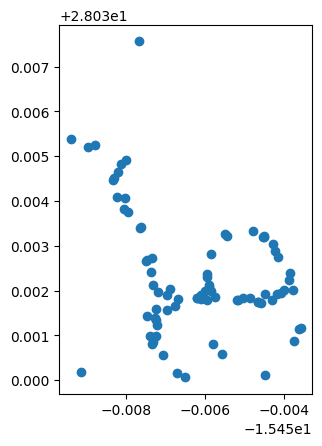

In [61]:
grid_summary = grid_species.groupby(["cuadricula", "specie", "name", "geometry"]).size().reset_index(name = "n")
gpd.GeoDataFrame(grid_summary, geometry="geometry").plot()

In [62]:
grid_summary

,cuadricula,specie,name,geometry,n
0,24,Euphorbia regis-jubae,"Tabaiba amarga, Tabaiba salvaje, higuerilla",POINT (-15.45914 28.03019),1
1,30,Euphorbia regis-jubae,"Tabaiba amarga, Tabaiba salvaje, higuerilla",POINT (-15.45940 28.03538),1
2,46,Periploca laevigata,Cornical,POINT (-15.45824 28.03410),1
3,47,Euphorbia regis-jubae,"Tabaiba amarga, Tabaiba salvaje, higuerilla",POINT (-15.45813 28.03483),1
4,47,Euphorbia regis-jubae,"Tabaiba amarga, Tabaiba salvaje, higuerilla",POINT (-15.45834 28.03447),1
...,...,...,...,...,...
77,147,Euphorbia regis-jubae,"Tabaiba amarga, Tabaiba salvaje, higuerilla",POINT (-15.45362 28.03114),1
78,147,Euphorbia regis-jubae,"Tabaiba amarga, Tabaiba salvaje, higuerilla",POINT (-15.45359 28.03117),1
79,148,Euphorbia regis-jubae,"Tabaiba amarga, Tabaiba salvaje, higuerilla",POINT (-15.45378 28.03201),1
80,148,Kleinia neriifolia,"Verode, verol",POINT (-15.45386 28.03240),1
